<a href="https://colab.research.google.com/github/liam-haas/CLPS0950_FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
%%capture
%pip install rdkit-pypi

In [65]:
from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDKFingerprint
import numpy as np

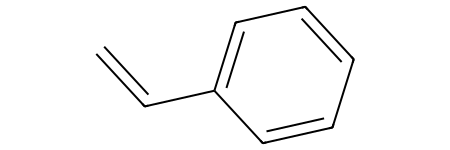

In [19]:
test = Chem.MolFromSmiles('C=CC1=CC=CC=C1')
test

In [18]:
substruc = Chem.MolFromSmiles('c1ccccc1')
test.HasSubstructMatch(substruc)

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [47]:
import pandas as pd

test_table = pd.read_csv('/content/drive/MyDrive/Test SMILES sequences - Classes.csv')
test_table = test_table.dropna(axis = 1)

,SMILES sequence,Class,Molecule
0,C=C,0,
1,C=CC,0,
2,C=CCC,0,
3,C/C=C/C,0,
4,C=CCCC,0,
5,C/C=C\C,0,
6,C/C=C/CC,0,
7,C/C=C\CC,0,
8,C=CC(CC)C,1,
9,C/C=C/C(C)C,1,

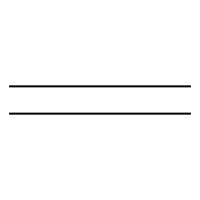
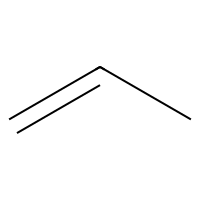
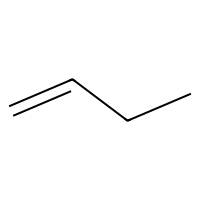
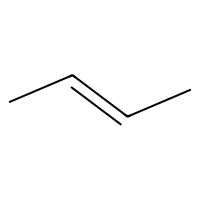
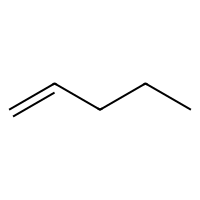
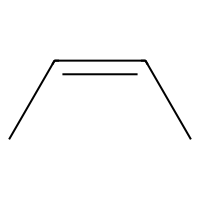
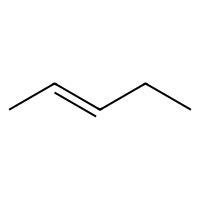
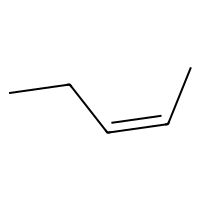
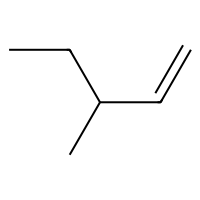
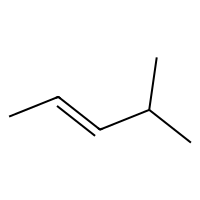
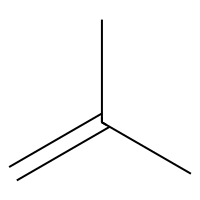
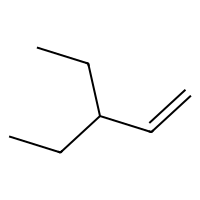
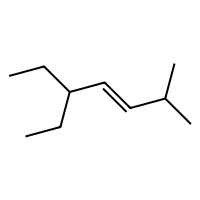
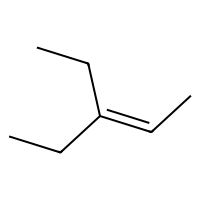
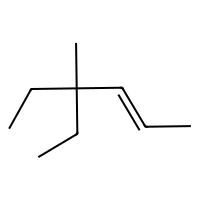
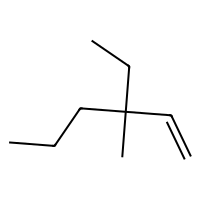
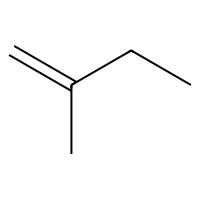
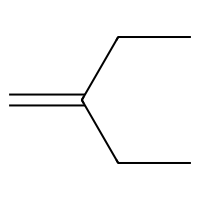
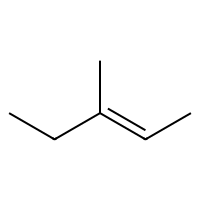
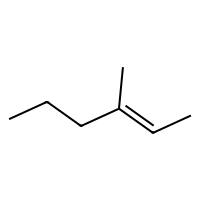
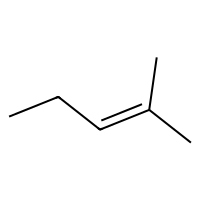
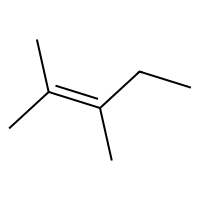
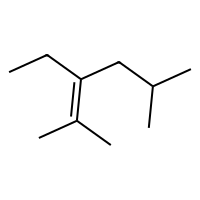
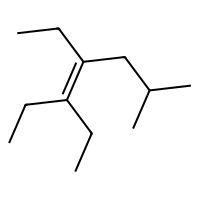
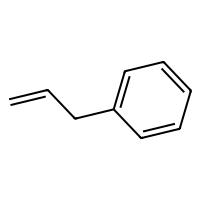
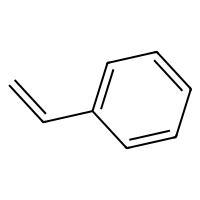
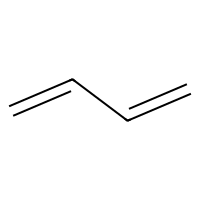

In [64]:
PandasTools.AddMoleculeColumnToFrame(test_table, 'SMILES sequence', 'Molecule')
test_table

In [51]:
!pip install scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Should do extended fingerprint connectivity because just ones and zeros for the entries. Then need to hash into a single number. Simplest way is value in the entry times 2 to the power of the entry summed over the array. Maybe looks for a converter. This should allow for classification algorithm to run. Can also try ASCII for smiles, see if they look similar. 

,SMILES sequence,Class,Molecule,fingerprint
0,C=C,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C=CC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,C=CCC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,C/C=C/C,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,C=CCCC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,C/C=C\C,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,C/C=C/CC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,C/C=C\CC,0,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,C=CC(CC)C,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,C/C=C/C(C)C,1,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

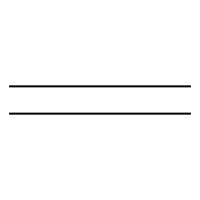
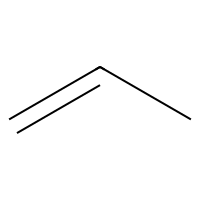
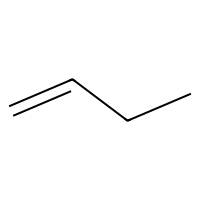
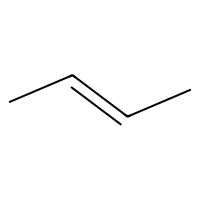
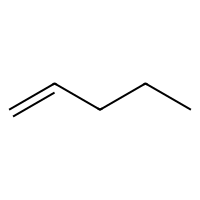
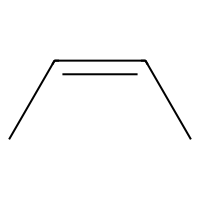
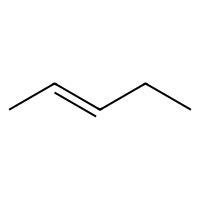
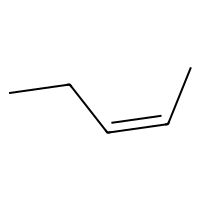
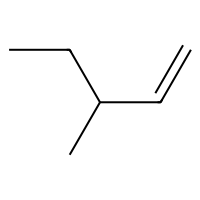
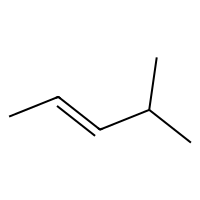
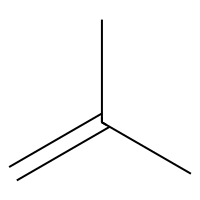
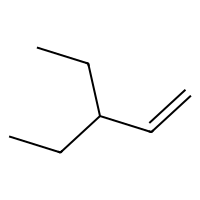
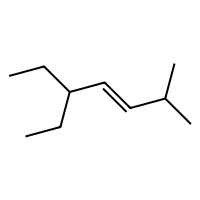
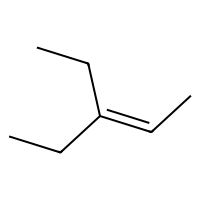
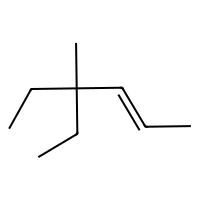
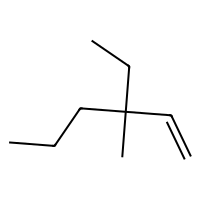
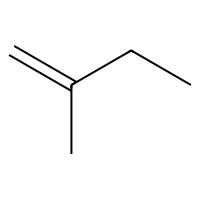
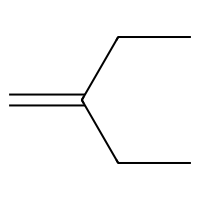
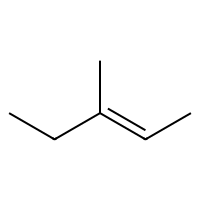
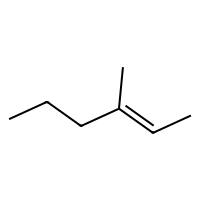
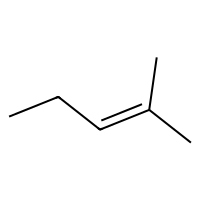
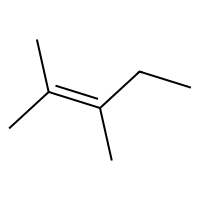
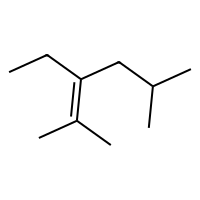
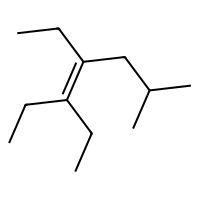
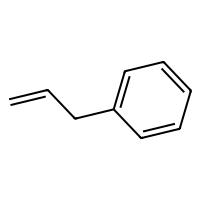
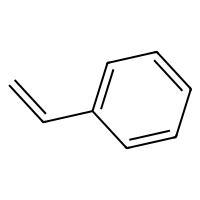
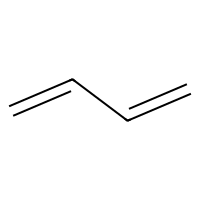

In [74]:
for mol in test_table['Molecule']:
  test_table['fingerprint'] = RDKFingerprint(mol)
test_table

In [80]:
feature = test_table['fingerprint']
target = test_table['Class']

In [77]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200, max_depth = 10, random_state = 40)
model.fit(feature, target)

ValueError: ignored